引入必要库

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct
import warnings

忽略特定警告

In [ ]:
# 忽略特定警告
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

设置绘图风格

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')

定义函数

In [31]:
def analyze_system(sys, ω_range):
    """
    综合频域分析函数

    参数:
    sys: 系统传递函数
    ω_range: 频率范围(可选)
    """
    # 创建图形
    fig = plt.figure(figsize=(15, 10))

    # 1. 绘制伯德图
    ax1 = plt.subplot(2, 2, 1)
    if ω_range is not None:
        mag, phase, omega = ct.bode_plot(sys, omega=ω_range, plot=False)
    else:
        mag, phase, omega = ct.bode_plot(sys, plot=False)

    # 绘制幅频特性
    plt.subplot(2, 2, 1)
    plt.semilogx(omega, 20 * np.log10(mag))
    plt.title('Bode Plot - Magnitude')
    plt.ylabel('Magnitude [dB]')
    plt.grid(True, which='both')

    # 绘制相频特性
    plt.subplot(2, 2, 3)
    plt.semilogx(omega, phase * 180 / np.pi)
    plt.title('Bode Plot - Phase')
    plt.ylabel('Phase [deg]')
    plt.xlabel('Frequency [rad/s]')
    plt.grid(True, which='both')

    # 2. 绘制奈奎斯特图
    plt.subplot(2, 2, 2)
    if ω_range is not None:
        ct.nyquist_plot(sys, omega=ω_range)
    else:
        ct.nyquist_plot(sys)
    plt.title('Nyquist Plot')
    plt.grid(True)

    # 3. 计算稳定裕度
    gm, pm, wg, wp = ct.margin(sys)

    # 4. 计算带宽和谐振峰值
    ω_b, Mr = calculate_bandwidth_and_resonance(sys, omega, mag)

    # 显示计算结果
    plt.subplot(2, 2, 4)
    plt.axis('off')

    info_text = f"""
    Stability Margins:
    Gain Margin: {gm:.2f} ({20 * np.log10(gm):.2f} dB) at {wg:.2f} rad/s
    Phase Margin: {pm:.2f}° at {wp:.2f} rad/s

    Frequency Domain Specifications:
    Bandwidth (ω_b): {ω_b:.2f} rad/s
    Resonant Peak (Mr): {Mr:.2f} dB

    System Performance:
    """

    # 添加系统性能分析
    if pm > 0:
        info_text += f"- System is stable with {pm:.2f}° phase margin\n"
    else:
        info_text += "- System is unstable\n"

    if pm > 30:
        info_text += "- Good robustness to parameter variations\n"
    else:
        info_text += "- Marginal stability, consider increasing phase margin\n"

    if Mr < 3:  # 小于3dB的谐振峰值通常表示良好的阻尼
        info_text += "- Well-damped system response\n"
    else:
        info_text += "- Underdamped system with significant overshoot\n"

    plt.text(1, -1, info_text, fontsize=12, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    plt.tight_layout()
    plt.show()

    return gm, pm, wg, wp, ω_b, Mr


def calculate_bandwidth_and_resonance(sys, omega, mag):
    """
    计算带宽和谐振峰值

    参数:
    sys: 系统传递函数
    omega: 频率向量
    mag: 幅值向量

    返回:
    ω_b: 带宽频率(rad/s)
    Mr: 谐振峰值(dB)
    """
    # 计算DC增益
    dc_gain = ct.dcgain(sys)
    if np.isinf(dc_gain) or np.isnan(dc_gain):
        dc_gain = mag[0]  # 使用第一个频率点的增益

    # 计算-3dB点(带宽)
    mag_db = 20 * np.log10(mag)
    dc_gain_db = 20 * np.log10(np.abs(dc_gain))
    threshold = dc_gain_db - 3  # -3dB点

    # 寻找带宽频率
    ω_b = None
    for i in range(1, len(mag_db)):
        if mag_db[i] <= threshold:
            ω_b = omega[i]
            break

    # 计算谐振峰值
    Mr = np.max(mag_db) if len(mag_db) > 0 else 0

    return ω_b, Mr


# 示例系统
def example_system():
    """创建一个示例系统"""
    num = [4]
    den = [1, 3, 3, 1]
    sys = ct.TransferFunction(num, den)

    return sys

创建并分析系统

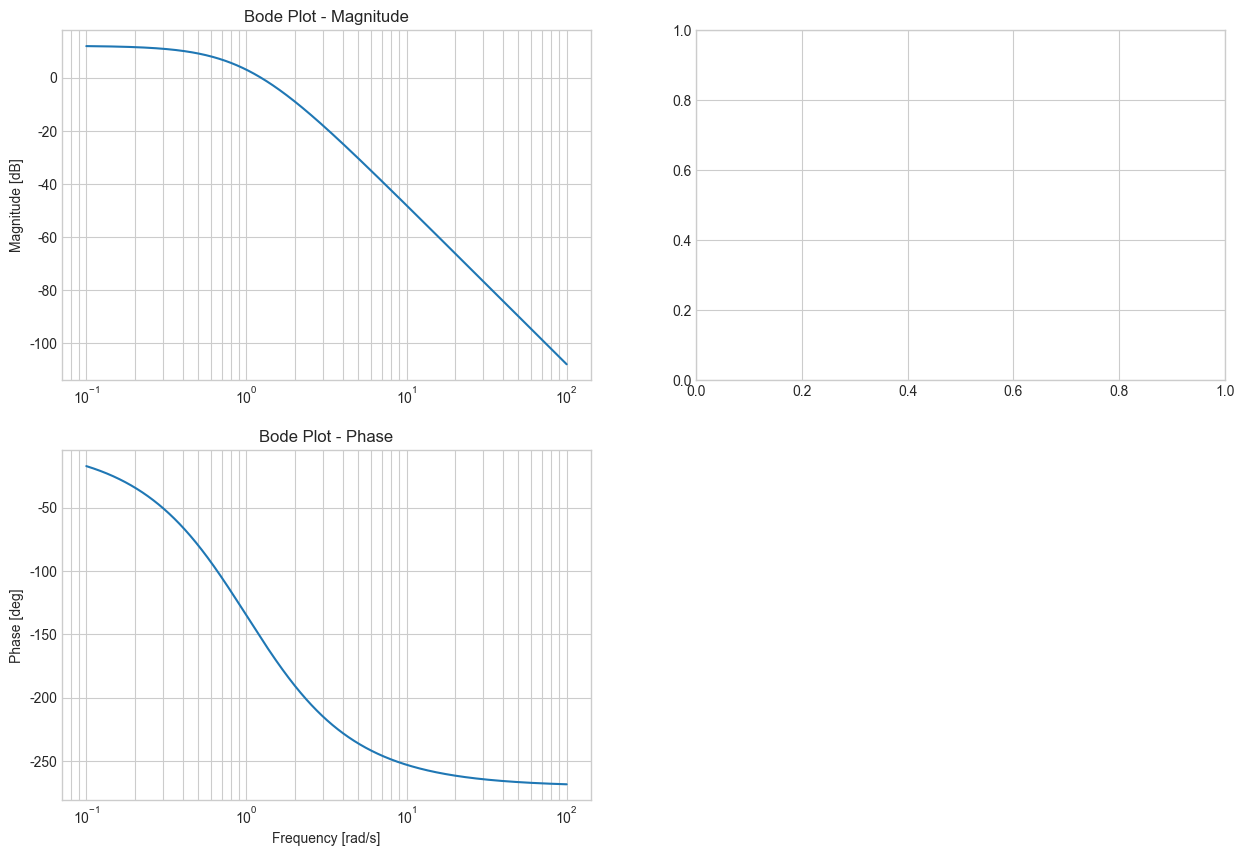

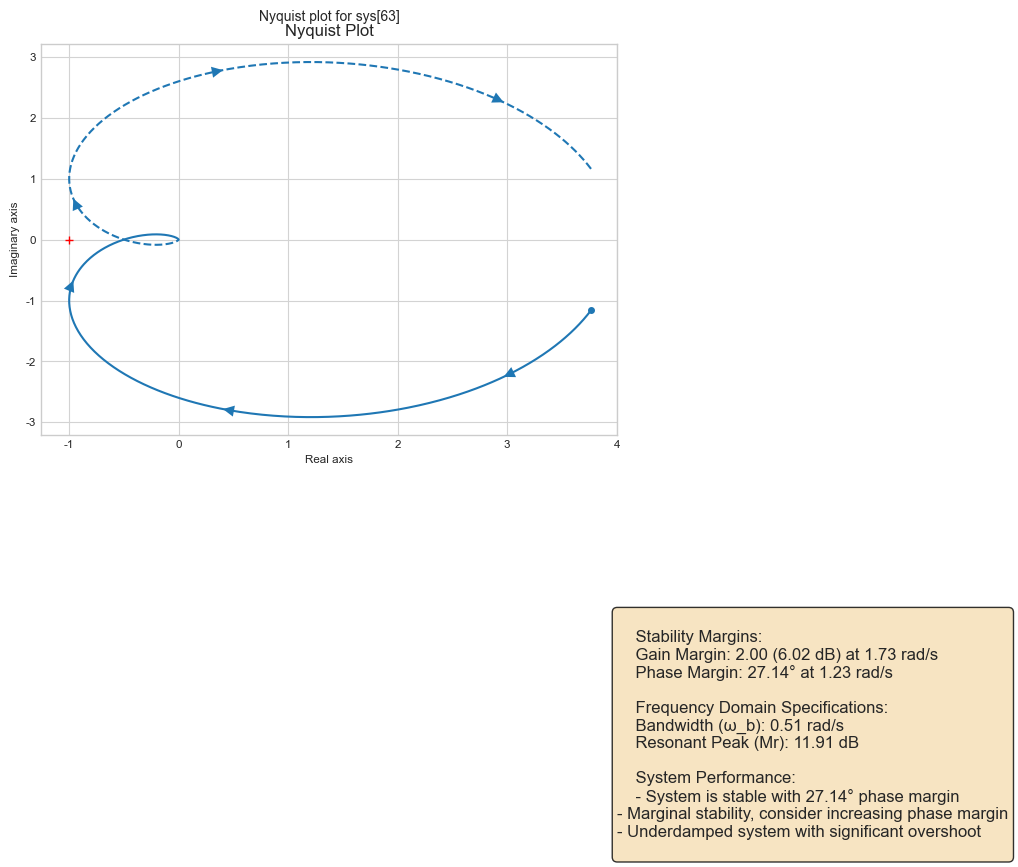


详细结果:
幅值裕度: 2.00 (6.02 dB) at 1.73 rad/s
相位裕度: 27.14° at 1.23 rad/s
带宽: 0.51 rad/s
谐振峰值: 11.91 dB


In [32]:
sys = example_system()
ω_range = np.logspace(-1, 2, 1000)  # 频率范围从0.1到100 rad/s

# 进行频域分析
gm, pm, wg, wp, ω_b, Mr = analyze_system(sys, ω_range)

print(f"\n详细结果:")
print(f"幅值裕度: {gm:.2f} ({20 * np.log10(gm):.2f} dB) at {wg:.2f} rad/s")
print(f"相位裕度: {pm:.2f}° at {wp:.2f} rad/s")
print(f"带宽: {ω_b:.2f} rad/s")
print(f"谐振峰值: {Mr:.2f} dB")